In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
data = {
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Amit", "Neha", "Rahul", "Priya", "Sandeep"],
    "Age": [20, np.nan, 21, np.nan, 22],
    "Marks": [85, 90, np.nan, 78, 88],
    "Gender": ["M", "F", "M", "F", "M"]
}

df = pd.DataFrame(data)

In [141]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 ID        0
Name      0
Age       2
Marks     1
Gender    0
dtype: int64


In [145]:
df["Age"] = df["Age"].fillna(mean_age)
df["Marks"] = df["Marks"].fillna(median_marks)

In [147]:
median_marks = df["Marks"].median()
print("\nCurated dataset:\n", df)


Curated dataset:
    ID     Name   Age  Marks Gender
0   1     Amit  20.0   85.0      M
1   2     Neha  21.0   90.0      F
2   3    Rahul  21.0   86.5      M
3   4    Priya  21.0   78.0      F
4   5  Sandeep  22.0   88.0      M


In [149]:
df["Result"] = np.where(df["Marks"] >= 50, "Pass", "Fail")
print(df)

   ID     Name   Age  Marks Gender Result
0   1     Amit  20.0   85.0      M   Pass
1   2     Neha  21.0   90.0      F   Pass
2   3    Rahul  21.0   86.5      M   Pass
3   4    Priya  21.0   78.0      F   Pass
4   5  Sandeep  22.0   88.0      M   Pass


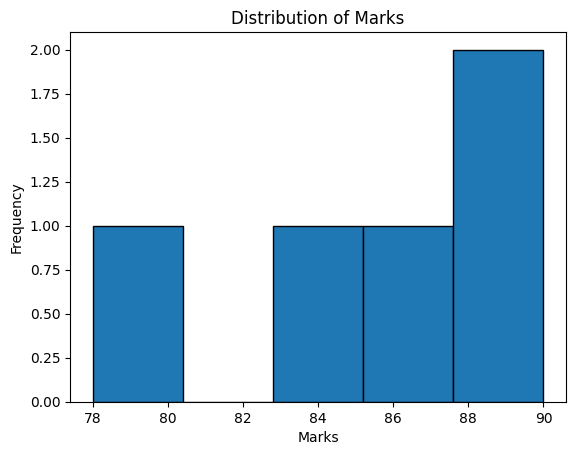

In [151]:
plt.hist(df["Marks"], bins=5, edgecolor="black")
plt.title("Distribution of Marks")
plt.xlabel("Marks")
plt.ylabel("Frequency")
plt.show()

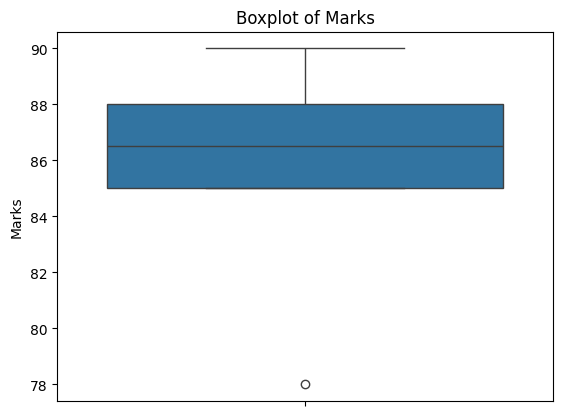

In [153]:
sns.boxplot(y=df["Marks"])
plt.title("Boxplot of Marks")
plt.show()

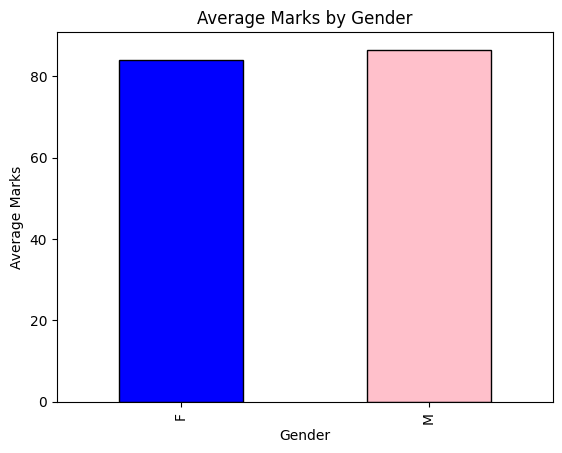

In [155]:
avg_marks = df.groupby("Gender")["Marks"].mean()
avg_marks.plot(kind="bar", color=["blue", "pink"], edgecolor="black")
plt.title("Average Marks by Gender")
plt.ylabel("Average Marks")
plt.xlabel("Gender")
plt.show()

In [157]:
titanic = sns.load_dataset("titanic")

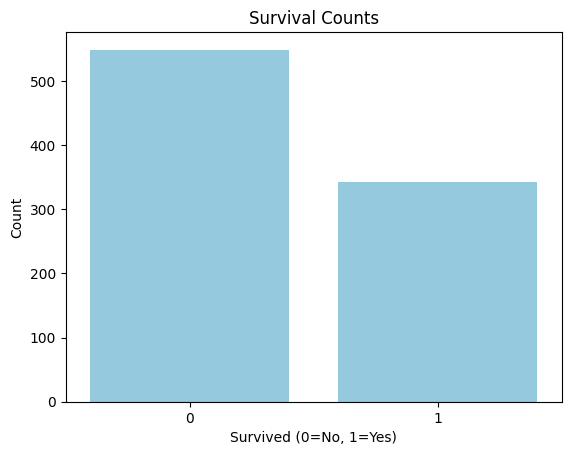

In [159]:
sns.countplot(x="survived", data=titanic, color="skyblue")
plt.title("Survival Counts")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


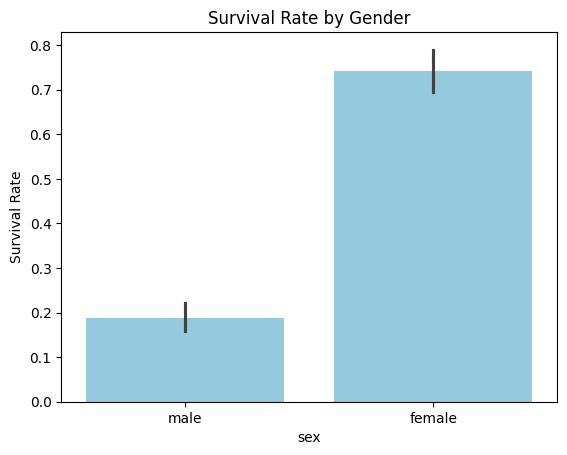

In [161]:
sns.barplot(x="sex", y="survived", data=titanic, color="skyblue")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

In [221]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("full_grouped.csv")

In [223]:
df.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

In [225]:
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [227]:

df_cleaned = df[["Date", "Country/Region", "Confirmed", "Deaths"]].copy()

In [231]:
df["Date"] = pd.to_datetime(df["Date"])

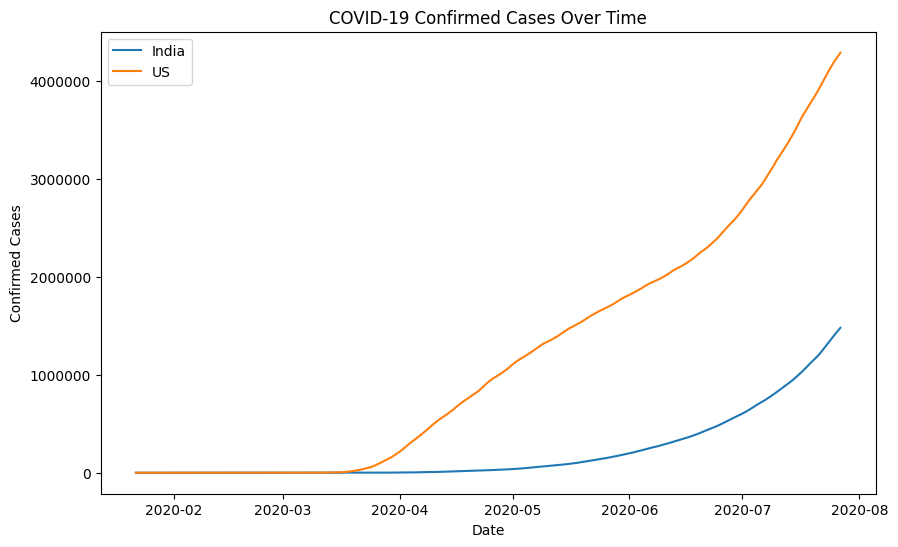

In [233]:
countries = ["India", "US"]
df_filtered = df[df["Country/Region"].isin(countries)]

plt.figure(figsize=(10,6))
for country in countries:
    country_data = df_filtered[df_filtered["Country/Region"] == country]
    plt.plot(country_data["Date"], country_data["Confirmed"], label=country)

plt.title("COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.ticklabel_format(style="plain", axis="y") 
plt.legend()
plt.show()
